In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sys, os
from pathlib import Path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'utils')))
from import_funcs import * 

In [25]:
path = "./data/"

# Functions extract_data

In [26]:
def extract_data_spike_flex(filename):
    """
    Extract data from a text file generated by makerplot or equivalent, mimicking the MATLAB behavior.
    Handles different versions of file structures.
    
    Args:
        filename: The text file containing the data to extract.
        
    Returns:
        idx_start: List containing the index(es) where power is launched.
        idx_stop: List containing the index(es) where power is stopped.
        delta_time: Median time difference between records.
        T : List of different temperatures (T_antenna: Temperature of the antenna, T_ref :
        Temperature measured at the switch by a TC, T_display: Temperature measured by the antenna)
        X : List of different data used in the regression for calibration (V_rad : Voltage measured by 
        radiometer, V_spike : Voltage measured by antenna's TC, V_ref : Voltage measured by the switch's
        TC, V_housing : Voltage of the T° measurement in the radiometer box, cooling_flag, power : Fwd
        power measured by the generator)
    """
    # Read the data file (assuming it is comma or tab-delimited)
    data = pd.read_table(filename, header=None, delimiter=',')  # Use '\t' if it's tab-delimited
    
    # Determine the structure of the file based on the number of columns
    num_columns = data.shape[1]
    #print("Number of columns in the file:", num_columns)
    if num_columns == 16:
        column_names = ['time', 'seconds', 'empty', 'refl_power', 'T_spike', 'T_ref',
                        'avg_temp', 'flag_power', 'luxtron_2', 'T_display', 'Ant_Ref', 'Antenna_nb',
                        'PowerFwd', 'V_ref', 'V_rad', 'V_spike']
        data.columns = column_names
    elif  num_columns== 39:
        column_names = ['time', 'seconds','Empty', 'Average_Vspike','Average_Vref','Average_Vrad',
                'T_spike','T_ref','Average_temp_rise','T_display','Ant-Ref','Reflected_Power',
                'PowerFwd','flag_power','Setpower','Antenna_nb','Status','Ref_slope','Ref_offset',
                'Rad_slope','Rad_offset','Power_slope','Power_offset','Switch_loss',
                'Antena_loss','Spike_slope','spike_offset','ADC_FWD','ADC_refl','DACout','V_ref','V_rad','V_spike','external_loss','lastloop',
                'ampFWD','ampRefl','FWD_dBm','Refl_dBm']
        data.columns = column_names
    elif num_columns== 23 and data.iloc[0, 2] == ' ' :
        column_names = ['time', 'seconds', 'empty', 'V_spike','V_ref','V_rad', 'T_spike', 'T_ref',
                        'Average_temp_rise','T_display','Ant-Ref','Reflected_Power','PowerFwd','flag_power','setpower','Antenna_nb',
                        'a','b','c','d','e','f','V_housing']
        data.columns = column_names
    elif  num_columns== 23:
        column_names = ['time', 'seconds', 'V_spike','V_ref','V_rad', 'T_spike', 'T_ref',
                        'Average_temp_rise','T_display','Ant-Ref','Reflected_Power','PowerFwd','flag_power','setpower','Antenna_nb',
                        'a','b','c','d','e','f','V_housing', 'cooling_flag']
        data.columns = column_names
    elif  num_columns== 24:
        column_names = ['time', 'seconds', 'V_spike','V_ref','V_rad', 'T_spike', 'T_ref',
                        'Average_temp_rise','T_display','Ant-Ref','Reflected_Power','PowerFwd','flag_power','setpower','Antenna_nb',
                        'a','b','c','d','e','f','V_housing', 'cooling_flag_1', 'cooling_flag_2']
        data.columns = column_names 
    elif  num_columns== 42:
        column_names = ['time', 'seconds','Empty', 'Average_Vspike','Average_Vref','Average_Vrad',
                        'T_spike','T_ref','Average_temp_rise','T_display','Ant-Ref','Reflected_Power',
                        'PowerFwd','flag_power','Setpower','Antenna_nb','Status','Ref_slope','Ref_offset',
                        'Rad_slope','Rad_offset','Power_slope','Power_offset','Switch_loss',
                        'Antena_loss','Spike_slope','spike_offset','ADC_FWD','ADC_refl','DACout','V_ref','V_rad','V_spike','external_loss','lastloop',
                        'ampFWD','ampRefl','FWD_dBm','Refl_dBm','V_housing','T_housing','zero']
        data.columns = column_names
    elif  num_columns== 40:
        column_names = ['time','seconds', 'Average_Vspike','Average_Vref','Average_Vrad',
            'T_spike','T_ref','Average_temp_rise','T_display','Ant-Ref','Reflected_Power',
            'PowerFwd','flag_power','Setpower','Antenna_nb','Status','Ref_slope','Ref_offset',
            'Rad_slope','Rad_offset','Power_slope','Power_offset','Switch_loss','Antena_loss',
            'Spike_slope','spike_offset','ADC_FWD','ADC_refl','DACout','V_ref',
            'V_rad','V_spike','external_loss','lastloop',
            'ampFWD','ampRefl','FWD_dBm','Refl_dBm','V_housing','T_housing']
        data.columns = column_names
    elif  num_columns== 41:
        column_names = ['time','seconds', 'Average_Vspike','Average_Vref','Average_Vrad',
            'T_spike','T_ref','Average_temp_rise','T_display','Ant-Ref','Reflected_Power',
            'PowerFwd','flag_power','Setpower','Antenna_nb','Status','Ref_slope','Ref_offset',
            'Rad_slope','Rad_offset','Power_slope','Power_offset','Switch_loss','Antena_loss',
            'Spike_slope','spike_offset','ADC_FWD','ADC_refl','DACout','V_ref',
            'V_rad','V_spike','external_loss','lastloop',
            'ampFWD','ampRefl','FWD_dBm','Refl_dBm','V_housing','T_housing','_']
        data.columns = column_names
    elif  num_columns== 42:
        column_names = ['time','seconds', '_', 'Average_Vspike','Average_Vref','Average_Vrad',
            'T_spike','T_ref','Average_temp_rise','T_display','Ant-Ref','Reflected_Power',
            'PowerFwd','flag_power','Setpower','Antenna_nb','Status','Ref_slope','Ref_offset',
            'Rad_slope','Rad_offset','Power_slope','Power_offset','Switch_loss','Antena_loss',
            'Spike_slope','spike_offset','ADC_FWD','ADC_refl','DACout','V_ref',
            'V_rad','V_spike','external_loss','lastloop',
            'ampFWD','ampRefl','FWD_dBm','Refl_dBm','V_housing','T_housing','_']
        data.columns = column_names

    # Extract the temperature and power data based on antenna type
    antena_type = "spike"  # Assuming the antenna type is known for simplicity
    
    if antena_type == "spike":
        T_antenna = data['T_spike'].to_numpy()
        flag_power = data['flag_power']
    else:
        T_antenna = data['T_ref'].to_numpy()
        flag_power = data['flag_power'] if num_columns != 16 else data['luxtron_2']

    # Identify start and stop indices for the burn
    
    idx_start = np.where(np.diff(np.insert(flag_power.values, 0, 0)) == 1)[0]
    idx_start = idx_start.tolist()
    idx_stop = np.where(np.diff(np.append(flag_power.values, 0)) == -1)[0]
    idx_stop = idx_stop.tolist()

    # Extract the Temperatures, Voltages and Power data

    V_rad = data['V_rad'].to_numpy()
    V_spike = data['V_spike'].to_numpy()
    V_ref = data['V_ref'].to_numpy()
    V_housing = data['V_housing'].to_numpy()
    T_ref = data['T_ref'].to_numpy()
    T_display = data['T_display'].to_numpy()
    power = data['PowerFwd'] * (data['flag_power'] > 0).astype(float)  # Power only during active flag_power
    delta_time = np.median(np.diff(data['seconds'].values))

    if 'cooling_flag' in data.columns : 
        cooling_flag = data['cooling_flag'].to_numpy()
    else : 
        cooling_flag = [float('nan') for k in range (len(data))]

    if 'cooling_flag_1' in data.columns : 
        cooling_flag_1 = data['cooling_flag_1'].to_numpy()
    else : 
        cooling_flag_1 = [float('nan') for k in range (len(data))]

    if 'cooling_flag_2' in data.columns : 
        cooling_flag_2 = data['cooling_flag_2'].to_numpy()
    else : 
        cooling_flag_2 = [float('nan') for k in range (len(data))]

    if 'V_housing' in data.columns : 
        V_housing = data['V_housing'].to_numpy()
    else : 
        V_housing = [float('nan') for k in range (len(data))]
    
    # Create dataframe for temperatures and regression parameters
    X = pd.DataFrame({'V_rad' : V_rad, 'V_spike' : V_spike, 'V_ref' : V_ref, 'V_housing' : V_housing, 'cooling_flag' : cooling_flag, 'cooling_flag_1' : cooling_flag_1, 'cooling_flag_2' : cooling_flag_2, 'power' : power})
    T = pd.DataFrame({'T_antenna' : T_antenna, 'T_ref' : T_ref, 'T_display' : T_display})
    
    return idx_start, idx_stop, delta_time, T, X, flag_power.values

In [27]:
def extract_data_inline(filename):
    """
    Extract data from a text file generated by makerplot or equivalent, mimicking the MATLAB behavior.
    Handles different versions of file structures.
    
    Args:
        filename: The text file containing the data to extract.
        
    Returns:
        idx_start: Index of start of burn.
        idx_stop: Index of stop of burn.
        delta_time: Median time difference between records.
        T : List of different temperatures
        X : List of different data used in the regression for calibration
    """
    # Read the data file (assuming it is comma or tab-delimited)
    data = pd.read_table(filename, header=None, delimiter=',')  # Use '\t' if it's tab-delimited
    
    # Determine the structure of the file based on the number of columns
    num_columns = data.shape[1]
    
    #print("Number of columns in the file:", num_columns)
    if num_columns == 16:
        column_names = ['time', 'seconds', 'empty', 'refl_power', 'T_spike', 'T_ref', 'avg_temp', 'flag_power', 'luxtron_2',
                        'T_display', 'Ant_Ref', 'Antenna_nb', 'PowerFwd', 'V_ref', 'V_rad', 'V_spike']
        data.columns = column_names
        
    elif  num_columns== 32 and data.iloc[0, 2] == ' ' :
        column_names = ['time', 'seconds','Empty', 'V_rad_short','V_housing','V_rad_tot',
            'T_spike','T_housing','T_diode','T_tissue','Ant_ref','reflPower','FwdPower','flag_power','setpower',
            'Antenna_nb','cathstatus', 'RefSlope','RefOffset','T_cable','RadSlope','RadOffset','HousingSlope',
            'Housingoffset','PwrSlope','PwrOffset','SwitchLoss','AntLoss','SpikeSlope','Spikeoffset','T_coef','zeros']
        data.columns = column_names

    elif  num_columns== 32 and not pd.isna(data.iloc[0, 2]) : #Rev5 inline coax, propeller v93
        column_names = ['time', 'seconds', 'V_rad_short','V_housing','V_rad_tot',
            'T_spike','T_housing','T_diode','T_tissue','T_cable','reflPower','FwdPower','flag_power','setpower',
            'Antnum','cathstatus','T_ant','T_short','FTcable','RadSlope','RadOffset','HousingSlope',
            'Housingoffset','PwrSlope','PwrOffset','SwitchLoss','AntLoss','SpikeSlope','Spikeoffset','T_coef','VTC2',
            'cooling_flag']
        data.columns = column_names

    elif  num_columns== 33 and not pd.isna(data.iloc[0, 2]) : #Rev5 inline coax, propeller v93
        column_names = ['time', 'seconds', 'V_rad_short','V_housing','V_rad_tot',
            'T_spike','T_housing','T_diode','T_tissue','T_cable','reflPower','FwdPower','flag_power','setpower',
            'Antnum','cathstatus','T_ant','T_short','FTcable','RadSlope','RadOffset','HousingSlope',
            'Housingoffset','PwrSlope','PwrOffset','SwitchLoss','AntLoss','SpikeSlope','Spikeoffset','T_coef','VTC2',
            'cooling_flag_1','cooling_flag_2']
        data.columns = column_names

    # Extract the temperature and power data based on antenna type
    antena_type = "spike"  # Assuming the antenna type is known for simplicity
    
    if antena_type == "spike":
        T_antenna = data['T_spike'].to_numpy()
        flag_power = data['flag_power']
    else:
        T_antenna = data['T_ref'].to_numpy()
        flag_power = data['flag_power'] if num_columns != 16 else data['luxtron_2']

    # Identify start and stop indices for the burn
    idx_start = np.where(np.diff(np.insert(flag_power.values, 0, 0)) == 1)[0]
    idx_start = idx_start.tolist()
    idx_stop = np.where(np.diff(np.append(flag_power.values, 0)) == -1)[0]
    idx_stop = idx_stop.tolist()

    # Extract the Temperatures, Voltages and Power data
    V_rad_short = data['V_rad_short'].to_numpy()
    V_rad_tot = data['V_rad_tot'].to_numpy()
    V_housing = data['V_housing'].to_numpy()
    V_diode = data['T_diode'].to_numpy() / 0.2
    V_spike = ((data['T_spike'] - data['Spikeoffset']) / data['SpikeSlope'])* 1000

    T_diode = data['T_diode'].to_numpy()
    T_display = data['T_tissue'].to_numpy()
    T_housing = data['T_housing'].to_numpy()

    if 'cooling_flag_1' in data.columns : 
        cooling_flag_1 = data['cooling_flag_1'].to_numpy()
    else : 
        cooling_flag_1 = [float('nan') for k in range (len(data))]

    if 'cooling_flag_2' in data.columns : 
        cooling_flag_2 = data['cooling_flag_2'].to_numpy()
    else : 
        cooling_flag_2 = [float('nan') for k in range (len(data))]

    power = data['FwdPower'] * (data['flag_power'] > 0).astype(float)  # Power only during active flag_power
    delta_time = np.median(np.diff(data['seconds'].values))

    # Create dataframe for temperatures and regression parameters
    X = pd.DataFrame({'V_rad_short' : V_rad_short, 'V_rad_tot' : V_rad_tot, 'V_spike' : V_spike, 'V_housing' : V_housing, 'V_diode' : V_diode, 'cooling_flag_1' : cooling_flag_1, 'cooling_flag_2' : cooling_flag_2, 'power' : power})
    T = pd.DataFrame({'T_antenna' : T_antenna, 'T_diode' : T_diode, 'T_housing' : T_housing, 'T_display' : T_display})
    
    return idx_start, idx_stop, delta_time, T, X

# Calibration

In [28]:
switch = "inline" # inline or classic

In [29]:
#sheet name : "Investigation protocol" for classic switch and "Inline coax investigation"

if switch == 'classic' :
    waterburn_dataset = pd.read_excel(path + "waterburn-dataset.xlsx", sheet_name="Investigation protocol")
elif switch == 'inline' :
    waterburn_dataset = pd.read_excel(path + "waterburn-dataset.xlsx", sheet_name="Inline coax investigation")

In [30]:
# Change the date here
waterburn_today = waterburn_dataset[waterburn_dataset["Date"] == pd.to_datetime("2025-07-18")] #"today" or "YYYY-MM-DD"

In [31]:
waterburn_today

,Date,Nb,Gen,Radiometer,Unnamed: 4,Cable - Rad to Swtich,Switch,antenna,Type,Bath_T,Power,Time,logfile,Cooling system,comment
178,2025-07-18,NaN,4.7,E,Apex Combiner v1.4,RG400/U 2m,NaN,Submarine flex #3,Waterburn,25.0,200.0,5.0,20250718_calib_g4-7r8combv1-4_submarineflex3_2...,NaN,NaN
179,2025-07-18,NaN,4.7,E,Apex Combiner v1.4,RG400/U 2m,NaN,Submarine flex #3,Waterburn,50.0,200.0,5.0,20250718_calib_g4-7r8combv1-4_submarineflex3_2...,NaN,NaN


In [32]:
# Initialisation of lists in which we extract data
idx_start_list = []
idx_stop_list = []
delta_time_list = []
T_list = []
X_list = []

# Extract data from the logs
for filename in  waterburn_today['logfile'] : 

    #extract_data_spike_flex for classic switch and extract_data_inline for ILS
    if switch == 'classic' :
        idx_start, idx_stop, delta_time, T, X, flag_power = extract_data_spike_flex(path + filename + '.txt') 
    elif switch == 'inline' :
        idx_start, idx_stop, delta_time, T, X = extract_data_inline(path + filename + '.txt') 

    idx_start_list.append(idx_start)
    idx_stop_list.append(idx_stop)
    delta_time_list.append(delta_time)
    T_list.append(T)
    X_list.append(X)

In [33]:
# Select logs if more than 2 calibration logs in one day
train = [0,1] # begin at 0

# Crop data if needed

"""
limit_inf = 300
limit_sup = 1450
X_list = [c[limit_inf : limit_sup].reset_index(drop = True) for c in X_list] 
T_list = [c[limit_inf : limit_sup].reset_index(drop = True) for c in T_list]
idx_start_list = [[c - limit_inf for c in sublist] for sublist in idx_start_list]
idx_stop_list = [[c - limit_inf for c in sublist] for sublist in idx_stop_list]
"""

# Filter Vrad
"""
if switch == "classic" : 
    X_list[train[0]]["V_rad"] = my_kalman_filter(X_list[train[0]]["V_rad"])
    X_list[train[1]]["V_rad"] = my_kalman_filter(X_list[train[1]]["V_rad"])

elif switch == "inline" :
    X_list[train[0]]["V_rad_short"] = my_kalman_filter(X_list[train[0]]["V_rad_short"])
    X_list[train[1]]["V_rad_short"] = my_kalman_filter(X_list[train[1]]["V_rad_short"])
    X_list[train[0]]["V_rad_tot"] = my_kalman_filter(X_list[train[0]]["V_rad_tot"])
    X_list[train[1]]["V_rad_tot"] = my_kalman_filter(X_list[train[1]]["V_rad_tot"])"""

# Selection of parameters for regression

# Classic switch : 'V_rad', 'V_ref','power','V_spike', 'cooling_flag', 'V_housing', 'cooling_flag_1', 'cooling_flag_2'
# Inline switch : 'V_rad_tot', 'V_rad_short', 'V_housing', 'power', 'V_spike', 'V_diode'

if switch == "classic" :
    parameters = ['V_rad', 'power', 'V_ref','V_spike']
    
if switch == "inline" :
    parameters = ['V_rad_tot', 'V_rad_short', 'V_housing', 'power', 'V_spike','V_diode']

X_list[train[0]] = X_list[train[0]][parameters]
X_list[train[1]] = X_list[train[1]][parameters]

# Concat parameters (concat data of the two temperatures)

X_concat = pd.concat([X_list[train[0]], X_list[train[1]]], axis=0)
X_concat = X_concat.reset_index(drop=True)

# Define Y

Y = [waterburn_today['Bath_T'].iloc[train[0]] for k in range (len(X_list[train[0]]))] + [waterburn_today['Bath_T'].iloc[train[1]] for k in range (len(X_list[train[1]]))]

In [34]:
# Linear regression

model = LinearRegression()
model.fit(X_concat, Y)

LinearRegression()

In [35]:
# Results of the linear regression

regression_coefficients = pd.DataFrame(model.coef_).T
regression_coefficients.columns = X_concat.columns
regression_coefficients['offset'] = model.intercept_
regression_coefficients

,V_rad_tot,V_rad_short,V_housing,power,V_spike,V_diode,offset
0,-0.222737,0.149851,0.286715,-0.068055,-0.021571,0.01685,-56.751349


In [36]:
# Other model with p-values 

X_concat = sm.add_constant(X_concat)
model2 = sm.OLS(Y, X_concat).fit()
print("\nP-values :\n", model2.pvalues)

regression_coefficients2 = pd.DataFrame(model2.params).T
regression_coefficients2


P-values :
 const          2.441274e-02
V_rad_tot      0.000000e+00
V_rad_short    0.000000e+00
V_housing      1.005008e-22
power          0.000000e+00
V_spike        1.101051e-14
V_diode        2.322199e-03
dtype: float64


,const,V_rad_tot,V_rad_short,V_housing,power,V_spike,V_diode
0,-56.751349,-0.222737,0.149851,0.286715,-0.068055,-0.021571,0.01685


In [37]:
"""regression_coefficients['V_rad_tot'][0] = -0.11498
regression_coefficients['V_rad_short'][0] =  0.06734
regression_coefficients['V_housing'][0] = -0.04087
regression_coefficients['V_spike'][0] = 0.0
#regression_coefficients[''].iloc[0] = 0.0
regression_coefficients['power'][0] = -0.08003
regression_coefficients['offset'][0]= 350 
regression_coefficients"""

"regression_coefficients['V_rad_tot'][0] = -0.11498\nregression_coefficients['V_rad_short'][0] =  0.06734\nregression_coefficients['V_housing'][0] = -0.04087\nregression_coefficients['V_spike'][0] = 0.0\n#regression_coefficients[''].iloc[0] = 0.0\nregression_coefficients['power'][0] = -0.08003\nregression_coefficients['offset'][0]= 350 \nregression_coefficients"

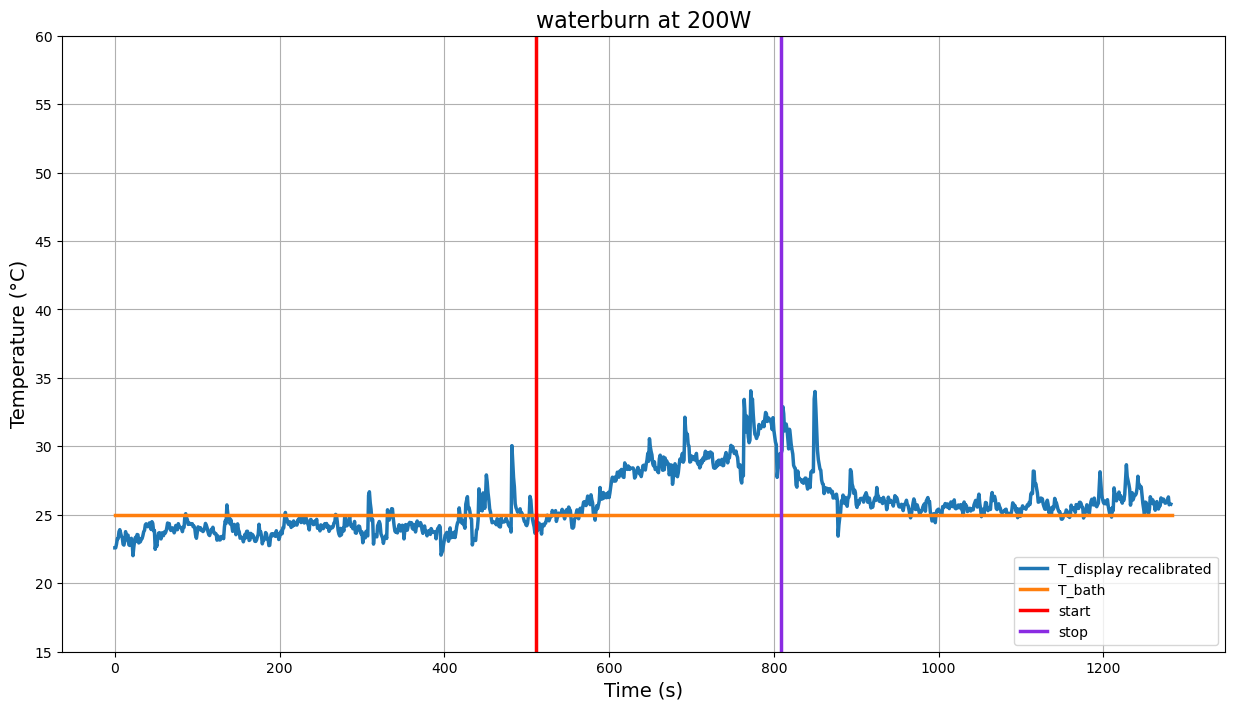

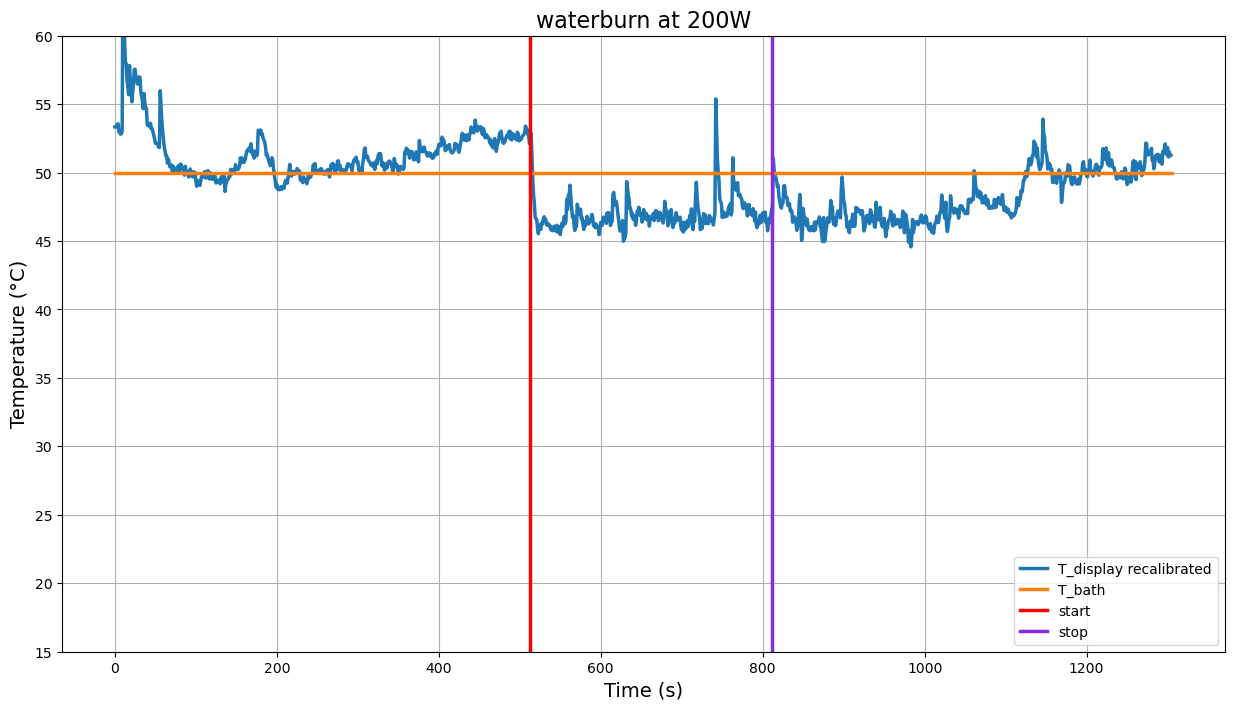

In [38]:
# Plot calibration results

for c in train : 
    
    plt.figure(c, figsize = (15, 8))
    plt.grid()
    
    #plt.plot(T_list[c]['T_antenna'],label = 'T_antenna', linewidth=2.5)
    plt.plot(my_kalman_filter(model.predict(X_list[c])),label='T_display recalibrated', linewidth=2.5)
    #plt.plot(T_list[c]['T_diode'],label='T_diode')
    
    T_bath = waterburn_today['Bath_T'].iloc[c]
    plt.plot([0, len(X_list[c])], [T_bath, T_bath], label='T_bath', linewidth=2.5)

    for d in idx_start_list[c]:
        start = d
        plt.plot([start, start],[0,100], label = 'start', linewidth=2.5, color = 'r')
        
    for e in idx_stop_list[c]:
        stop = e
        plt.plot([stop, stop],[0,100], label = 'stop', linewidth=2.5, color = '#8A2BE2')
    
    log_power = waterburn_today['Power'].iloc[c]
    plt.title(f'waterburn at {int(log_power)}W', fontsize = 16)
    
    plt.ylabel("Temperature (°C)", fontsize = 14)
    plt.xlabel('Time (s)', fontsize = 14)
    plt.legend(loc="lower right", fontsize = 10)
    plt.ylim(15,60)

    #plt.savefig(f'calib_{c}.png')
    
    plt.show()

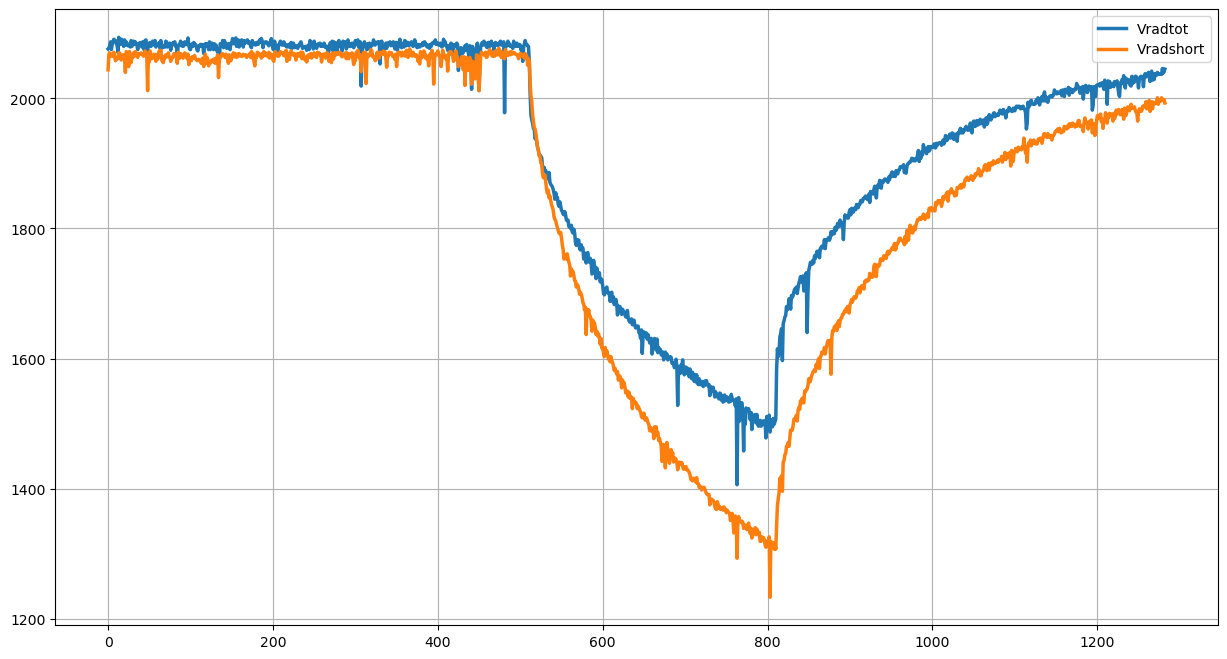

In [39]:
i = 0
plt.figure(c, figsize = (15, 8))
plt.grid()
plt.plot(X_list[i]['V_rad_tot'],label = 'Vradtot', linewidth=2.5)
plt.plot(X_list[i]['V_rad_short'],label = 'Vradshort', linewidth=2.5)
plt.legend()
plt.show()

# Vrad-tot over Vrad-short plot

In [40]:
import plotly.express as px

fig = px.scatter(X_list[0], x="V_rad_short", y="V_rad_tot", color="power")
fig.show()

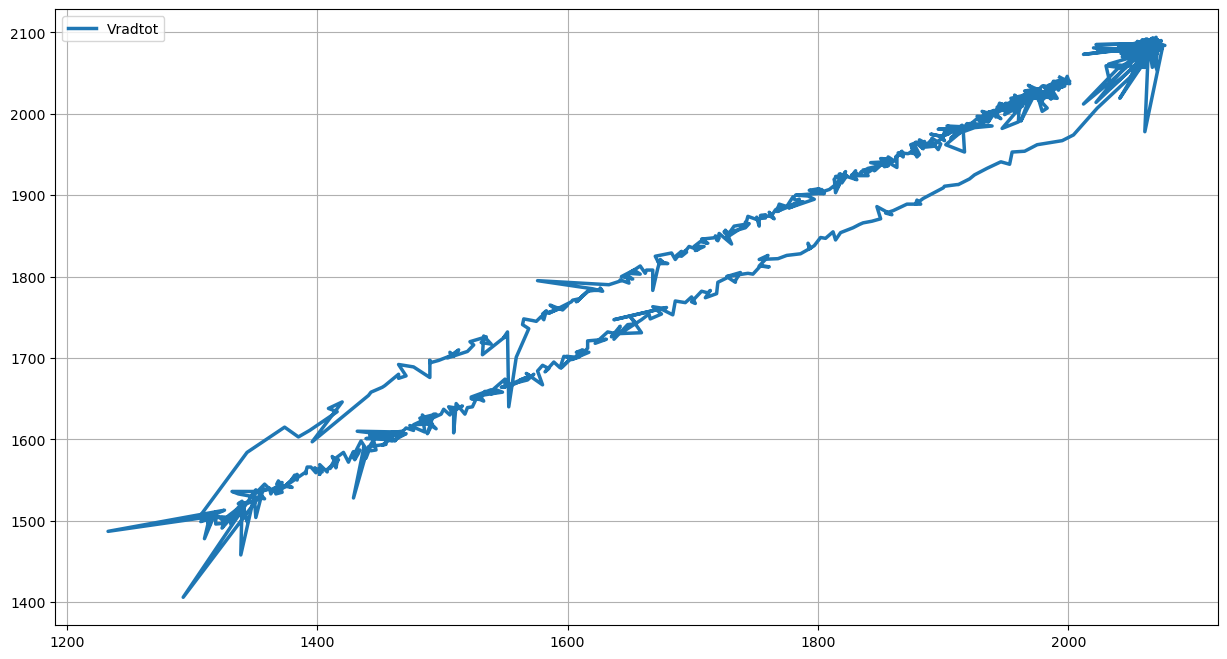

In [41]:
i = 0
plt.figure(c, figsize = (15, 8))
plt.grid()
plt.plot(X_list[i]['V_rad_short'], X_list[i]['V_rad_tot'],label = 'Vradtot', linewidth=2.5)
# plt.plot(X_list[i]['V_rad_short'],label = 'Vradshort', linewidth=2.5)
plt.legend()
plt.show()

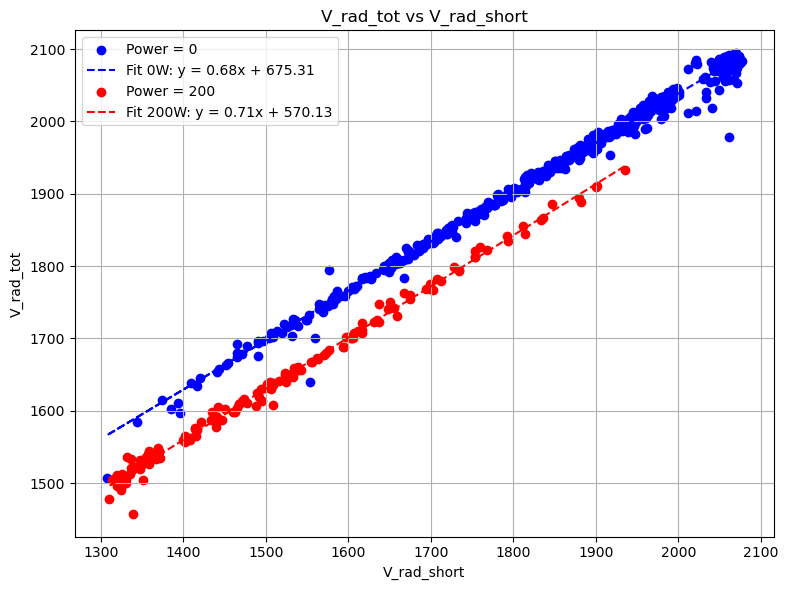

In [42]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# import numpy as np

df = X_list[0]
df_0 = df[df['power'] == 0]
df_200 = df[df['power'] == 200]

# Prepare the plot
plt.figure(figsize=(8, 6))

# Plot and fit for power == 0
x0 = df_0['V_rad_short'].values.reshape(-1, 1)
y0 = df_0['V_rad_tot'].values
model0 = LinearRegression().fit(x0, y0)
y0_pred = model0.predict(x0)
plt.scatter(x0, y0, color='blue', label='Power = 0')
plt.plot(x0, y0_pred, color='blue', linestyle='--',
         label=f'Fit 0W: y = {model0.coef_[0]:.2f}x + {model0.intercept_:.2f}')

# Plot and fit for power == 200
x200 = df_200['V_rad_short'].values.reshape(-1, 1)
y200 = df_200['V_rad_tot'].values
model200 = LinearRegression().fit(x200, y200)
y200_pred = model200.predict(x200)
plt.scatter(x200, y200, color='red', label='Power = 200')
plt.plot(x200, y200_pred, color='red', linestyle='--',
         label=f'Fit 200W: y = {model200.coef_[0]:.2f}x + {model200.intercept_:.2f}')

# Plot settings
plt.xlabel('V_rad_short')
plt.ylabel('V_rad_tot')
plt.legend()
plt.title('V_rad_tot vs V_rad_short')
plt.grid(True)
plt.tight_layout()
plt.show()


# Without Power Term

,V_rad_tot,V_rad_short,V_housing,V_spike,V_diode,offset
0,-0.231019,0.139555,0.668371,-0.01872,-0.111578,-313.972501


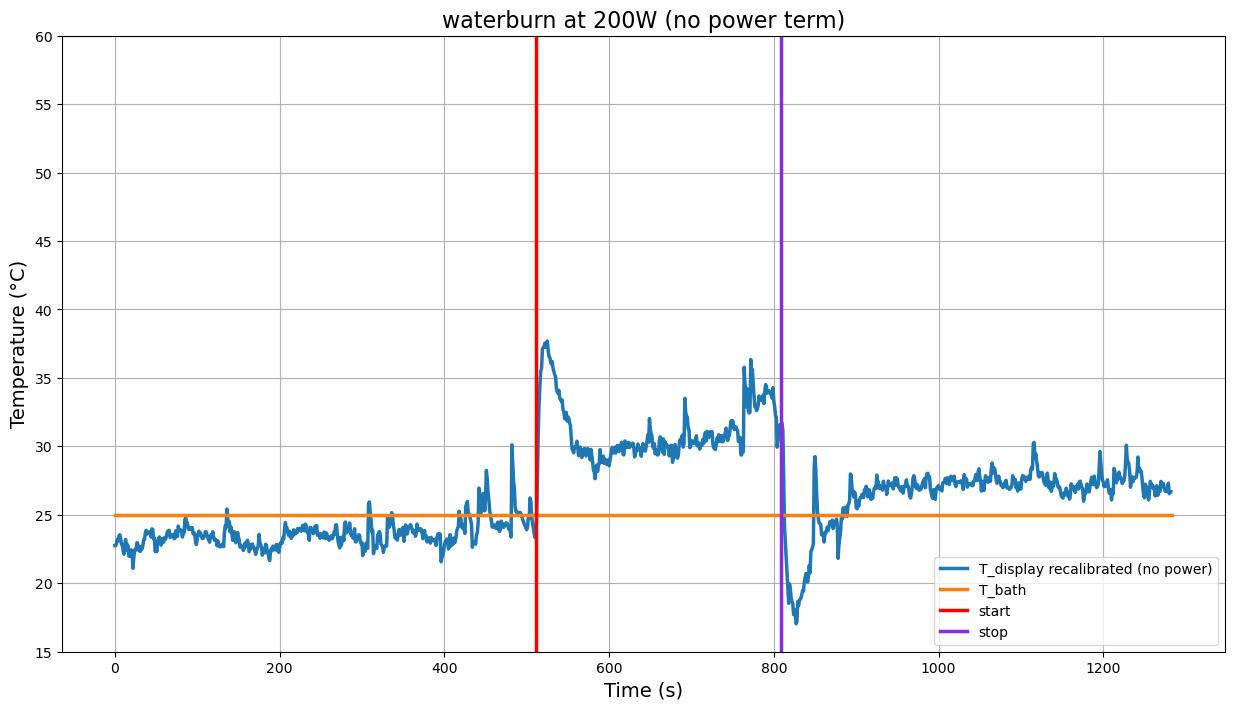

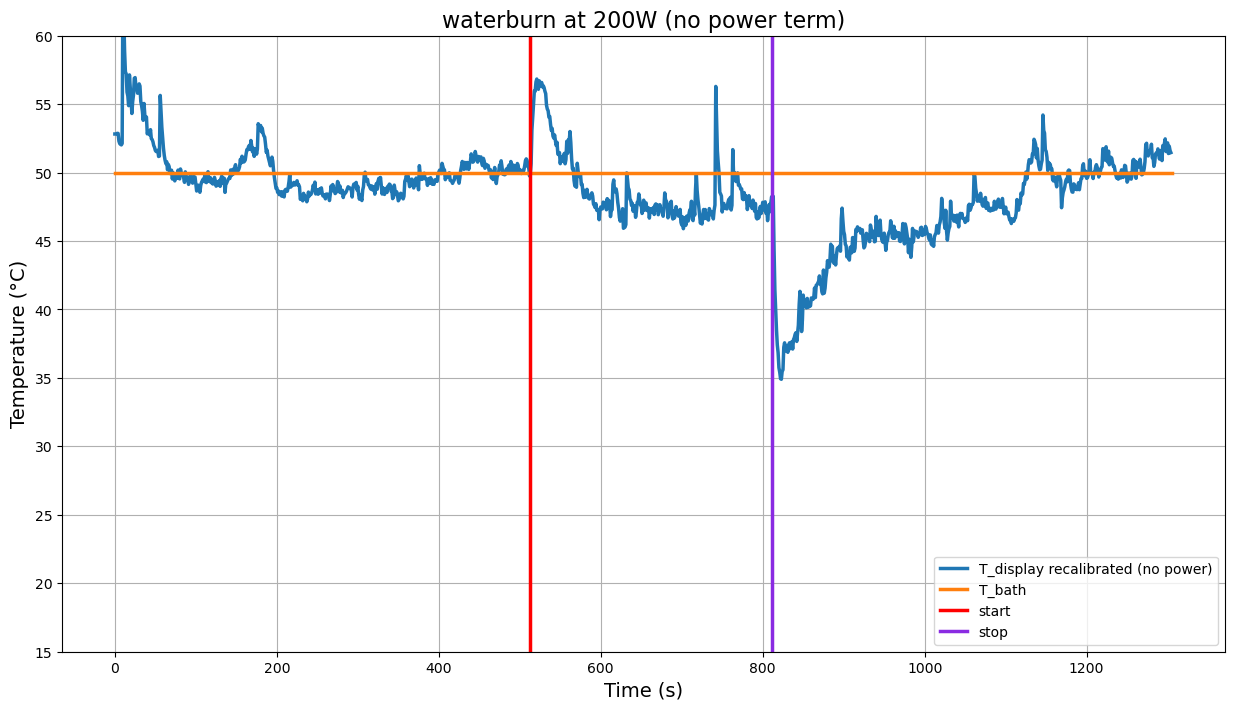

In [43]:
# Redo calibration without the power term

# Select parameters without 'power'
parameters_no_power = [p for p in parameters if p != 'power']

# Prepare X_list for regression without power
X_list_no_power = [X_list[0][parameters_no_power], X_list[1][parameters_no_power]]

# Concatenate for regression
X_concat_no_power = pd.concat(X_list_no_power, axis=0).reset_index(drop=True)

# Define Y as before
Y_no_power = [waterburn_today['Bath_T'].iloc[train[0]]] * len(X_list[0]) + [waterburn_today['Bath_T'].iloc[train[1]]] * len(X_list[1])

# Linear regression without power
model_no_power = LinearRegression()
model_no_power.fit(X_concat_no_power, Y_no_power)

# Results of the linear regression
regression_coefficients_no_power = pd.DataFrame(model_no_power.coef_).T
regression_coefficients_no_power.columns = X_concat_no_power.columns
regression_coefficients_no_power['offset'] = model_no_power.intercept_
display(regression_coefficients_no_power)

# Plot calibration results without power
for c in train:
    plt.figure(c, figsize=(15, 8))
    plt.grid()
    T_pred_no_power = model_no_power.predict(X_list[c][parameters_no_power])
    plt.plot(my_kalman_filter(T_pred_no_power), label='T_display recalibrated (no power)', linewidth=2.5)
    T_bath = waterburn_today['Bath_T'].iloc[c]
    plt.plot([0, len(X_list[c])], [T_bath, T_bath], label='T_bath', linewidth=2.5)
    for d in idx_start_list[c]:
        plt.plot([d, d], [0, 100], label='start', linewidth=2.5, color='r')
    for e in idx_stop_list[c]:
        plt.plot([e, e], [0, 100], label='stop', linewidth=2.5, color='#8A2BE2')
    log_power = waterburn_today['Power'].iloc[c]
    plt.title(f'waterburn at {int(log_power)}W (no power term)', fontsize=16)
    plt.ylabel("Temperature (°C)", fontsize=14)
    plt.xlabel('Time (s)', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.ylim(15, 60)
    plt.show()

# Using Time Derivatives

In [44]:
# --- Add after X_list is created and before plotting ---

window = 10  # Number of points for smoothing

for i in [0, 1]:
    # Smooth signals (rolling mean or use my_kalman_filter)
    vtot_smooth = X_list[i]['V_rad_tot'].rolling(window, center=True, min_periods=1).mean()
    vshort_smooth = X_list[i]['V_rad_short'].rolling(window, center=True, min_periods=1).mean()
    dt = delta_time_list[i]  # time step in seconds

    # Calculate derivatives
    X_list[i]['dV_rad_tot_dt'] = np.gradient(vtot_smooth, dt)
    X_list[i]['dV_rad_short_dt'] = np.gradient(vshort_smooth, dt)

# # Plot results for both logs
# for i in [0, 1]:
#     plt.figure(figsize=(15, 10))
#     plt.subplot(2, 1, 1)
#     plt.title(f'Log {i}: V_rad_tot and its derivative')
#     plt.plot(X_list[i]['V_rad_tot'], label='V_rad_tot', linewidth=2)
#     plt.plot(X_list[i]['dV_rad_tot_dt'], label='dV_rad_tot/dt', linewidth=2)
#     plt.legend()
#     plt.grid()

#     plt.subplot(2, 1, 2)
#     plt.title(f'Log {i}: V_rad_short and its derivative')
#     plt.plot(X_list[i]['V_rad_short'], label='V_rad_short', linewidth=2)
#     plt.plot(X_list[i]['dV_rad_short_dt'], label='dV_rad_short/dt', linewidth=2)
#     plt.legend()
#     plt.grid()
#     plt.tight_layout()
#     plt.show()

/var/folders/ck/m95myx7x7575w886yq8txthr0000gn/T/ipykernel_99891/3289414573.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



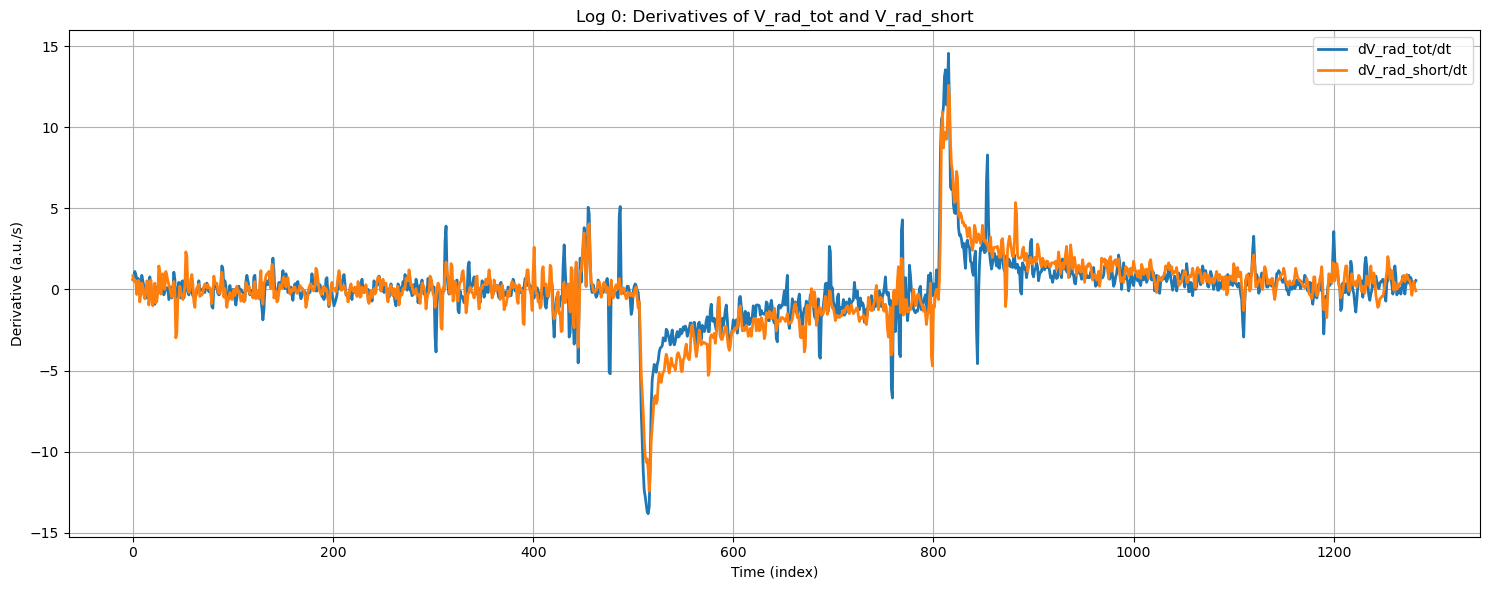

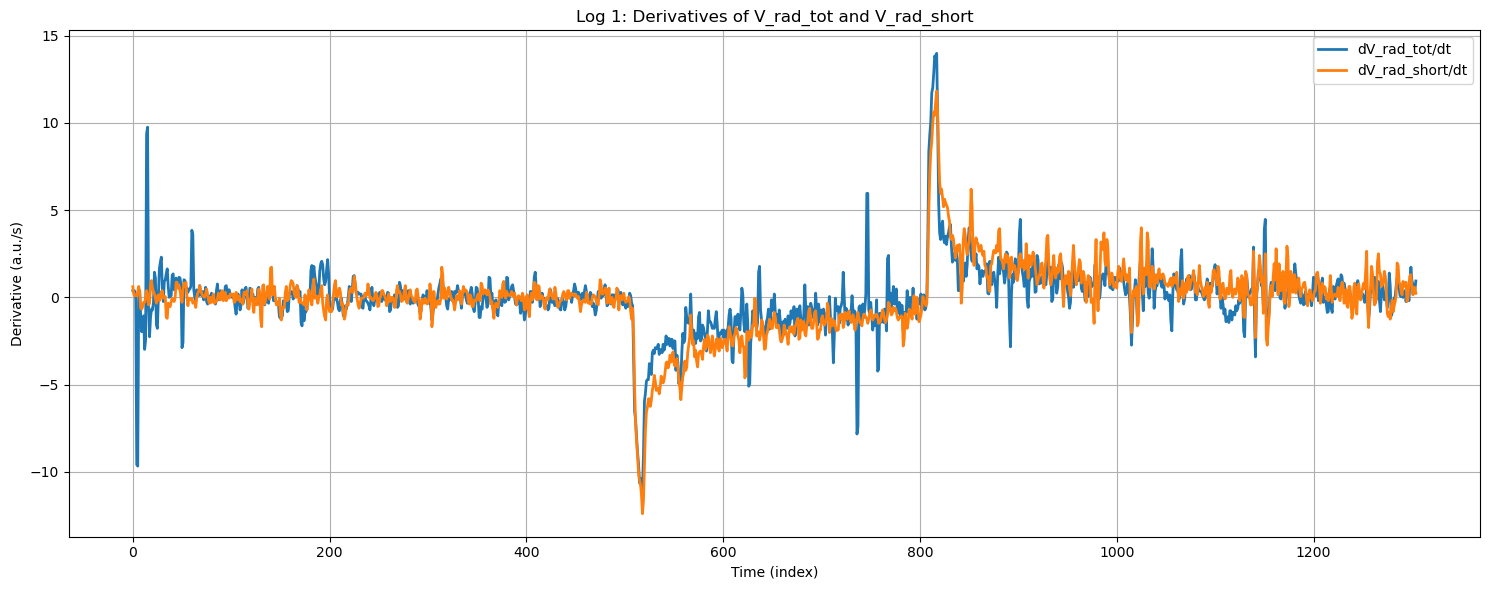

In [45]:
# Plot only the derivatives for each log

for i in [0, 1]:
    plt.figure(figsize=(15, 6))
    plt.plot(X_list[i]['dV_rad_tot_dt'], label='dV_rad_tot/dt', linewidth=2)
    plt.plot(X_list[i]['dV_rad_short_dt'], label='dV_rad_short/dt', linewidth=2)
    plt.title(f'Log {i}: Derivatives of V_rad_tot and V_rad_short')
    plt.xlabel('Time (index)')
    plt.ylabel('Derivative (a.u./s)')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

,V_rad_tot,V_rad_short,V_housing,V_spike,V_diode,dV_rad_tot_dt,dV_rad_short_dt,offset
0,-0.238666,0.154063,0.467739,-0.024693,-0.07737,-0.234898,1.332769,-166.914114


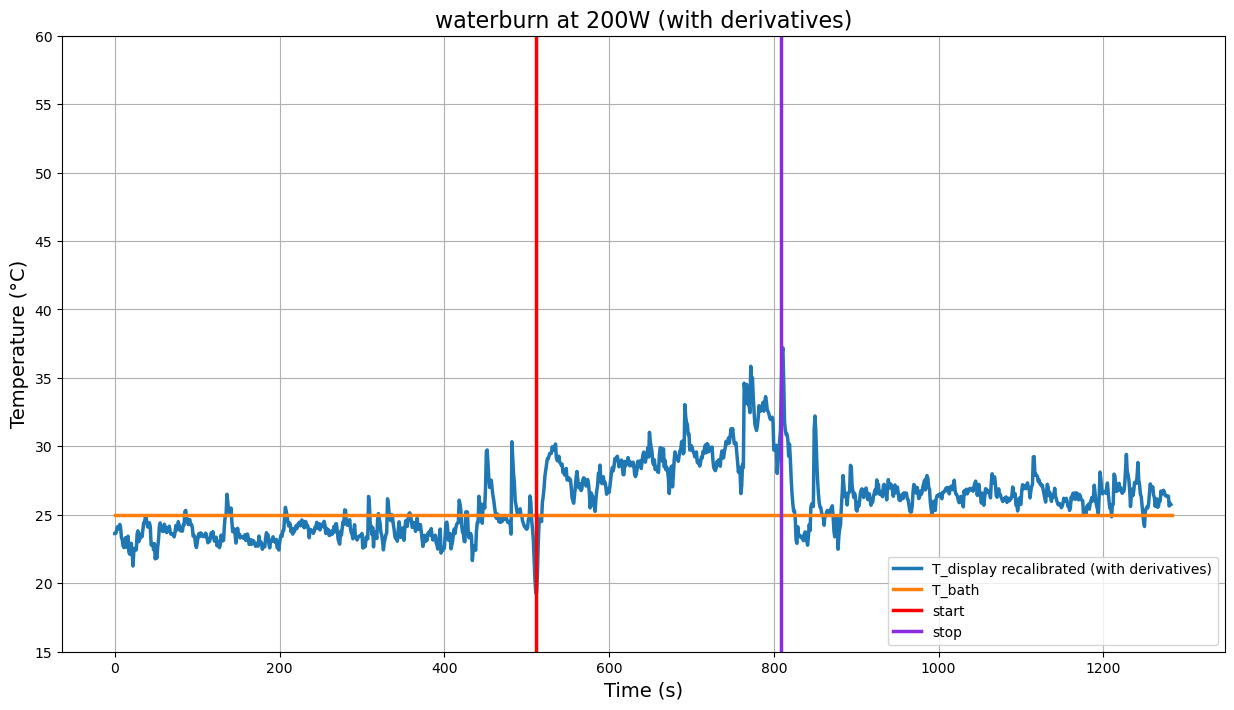

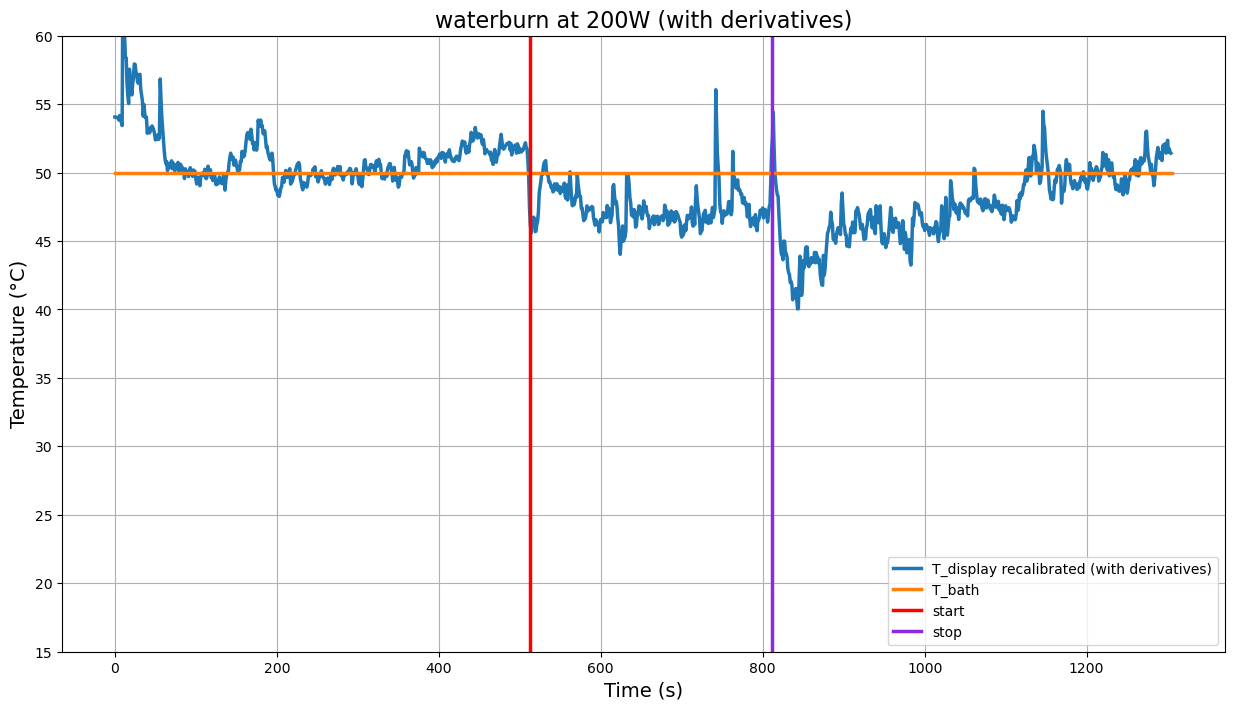

In [46]:
# Select new parameters including derivatives for regression
parameters_with_deriv = ['V_rad_tot', 'V_rad_short', 'V_housing', 'V_spike', 'V_diode', 'dV_rad_tot_dt', 'dV_rad_short_dt']

# Prepare X_list for regression
X_list_deriv = [X_list[0][parameters_with_deriv], X_list[1][parameters_with_deriv]]

# Concatenate for regression
X_concat_deriv = pd.concat(X_list_deriv, axis=0).reset_index(drop=True)

# Define Y as before
Y_deriv = [waterburn_today['Bath_T'].iloc[train[0]]] * len(X_list[0]) + [waterburn_today['Bath_T'].iloc[train[1]]] * len(X_list[1])

# Linear regression with derivatives
model_deriv = LinearRegression()
model_deriv.fit(X_concat_deriv, Y_deriv)

# Results of the linear regression
regression_coefficients_deriv = pd.DataFrame(model_deriv.coef_).T
regression_coefficients_deriv.columns = X_concat_deriv.columns
regression_coefficients_deriv['offset'] = model_deriv.intercept_
display(regression_coefficients_deriv)

# Plot calibration results with derivatives
for c in train:
    plt.figure(c, figsize=(15, 8))
    plt.grid()
    T_pred_deriv = model_deriv.predict(X_list[c][parameters_with_deriv])
    plt.plot(my_kalman_filter(T_pred_deriv), label='T_display recalibrated (with derivatives)', linewidth=2.5)
    T_bath = waterburn_today['Bath_T'].iloc[c]
    plt.plot([0, len(X_list[c])], [T_bath, T_bath], label='T_bath', linewidth=2.5)
    for d in idx_start_list[c]:
        plt.plot([d, d], [0, 100], label='start', linewidth=2.5, color='r')
    for e in idx_stop_list[c]:
        plt.plot([e, e], [0, 100], label='stop', linewidth=2.5, color='#8A2BE2')
    log_power = waterburn_today['Power'].iloc[c]
    plt.title(f'waterburn at {int(log_power)}W (with derivatives)', fontsize=16)
    plt.ylabel("Temperature (°C)", fontsize=14)
    plt.xlabel('Time (s)', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.ylim(15, 60)
    plt.show()

## Addint a Vrad * Vhousing term

In [61]:
# Calibration with V_rad_short * V_housing interaction term

# First, create the interaction term for both training datasets
for i in [0, 1]:
    X_list[i]['V_rad_short_x_V_housing'] = X_list[i]['V_rad_short'] * X_list[i]['V_housing']

# Select parameters including the interaction term
parameters_interaction = ['V_rad_tot', 'V_rad_short', 'V_housing', 'power', 'V_spike', 'V_diode', 'V_rad_short_x_V_housing']

# Prepare X_list for regression with interaction term
X_list_interaction = [X_list[0][parameters_interaction], X_list[1][parameters_interaction]]

# Concatenate for regression
X_concat_interaction = pd.concat(X_list_interaction, axis=0).reset_index(drop=True)

# Define Y as before
Y_interaction = [waterburn_today['Bath_T'].iloc[train[0]]] * len(X_list[0]) + [waterburn_today['Bath_T'].iloc[train[1]]] * len(X_list[1])

# Linear regression with interaction term
model_interaction = LinearRegression()
model_interaction.fit(X_concat_interaction, Y_interaction)

# Results of the linear regression
regression_coefficients_interaction = pd.DataFrame(model_interaction.coef_).T
regression_coefficients_interaction.columns = X_concat_interaction.columns
regression_coefficients_interaction['offset'] = model_interaction.intercept_

print("Regression coefficients with V_rad_short * V_housing interaction term:")
display(regression_coefficients_interaction)

# Also show statistical analysis with p-values
X_concat_interaction_stats = sm.add_constant(X_concat_interaction)
model_interaction_stats = sm.OLS(Y_interaction, X_concat_interaction_stats).fit()
print("\nP-values for interaction model:")
print(model_interaction_stats.pvalues)

regression_coefficients_interaction_stats = pd.DataFrame(model_interaction_stats.params).T
print("\nDetailed statistical results:")
display(regression_coefficients_interaction_stats)

Regression coefficients with V_rad_short * V_housing interaction term:


,V_rad_tot,V_rad_short,V_housing,power,V_spike,V_diode,V_rad_short_x_V_housing,offset
0,-0.210288,3.041426,7.102849,-0.059784,-0.009294,0.037789,-0.003509,-5703.76388



P-values for interaction model:
const                      6.688625e-118
V_rad_tot                   0.000000e+00
V_rad_short                1.004339e-127
V_housing                  1.054487e-124
power                      1.278860e-297
V_spike                     2.832393e-04
V_diode                     1.166955e-13
V_rad_short_x_V_housing    8.389397e-117
dtype: float64

Detailed statistical results:


,const,V_rad_tot,V_rad_short,V_housing,power,V_spike,V_diode,V_rad_short_x_V_housing
0,-5703.76388,-0.210288,3.041426,7.102849,-0.059784,-0.009294,0.037789,-0.003509


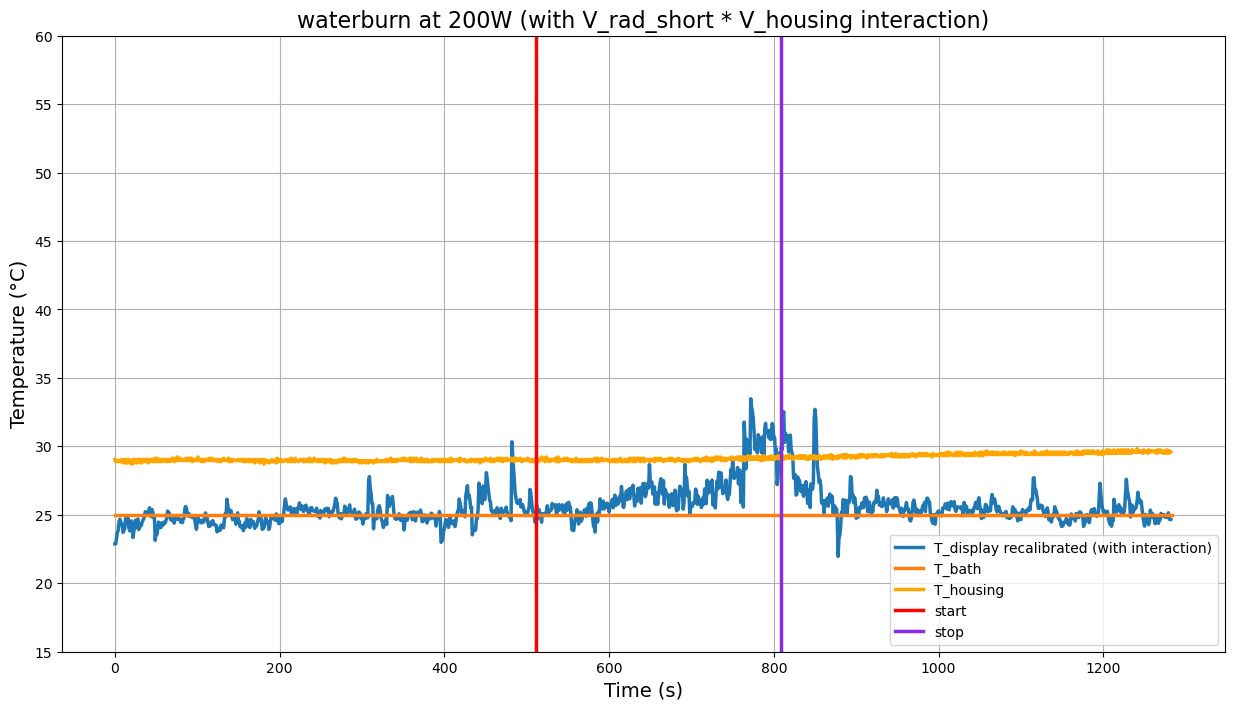

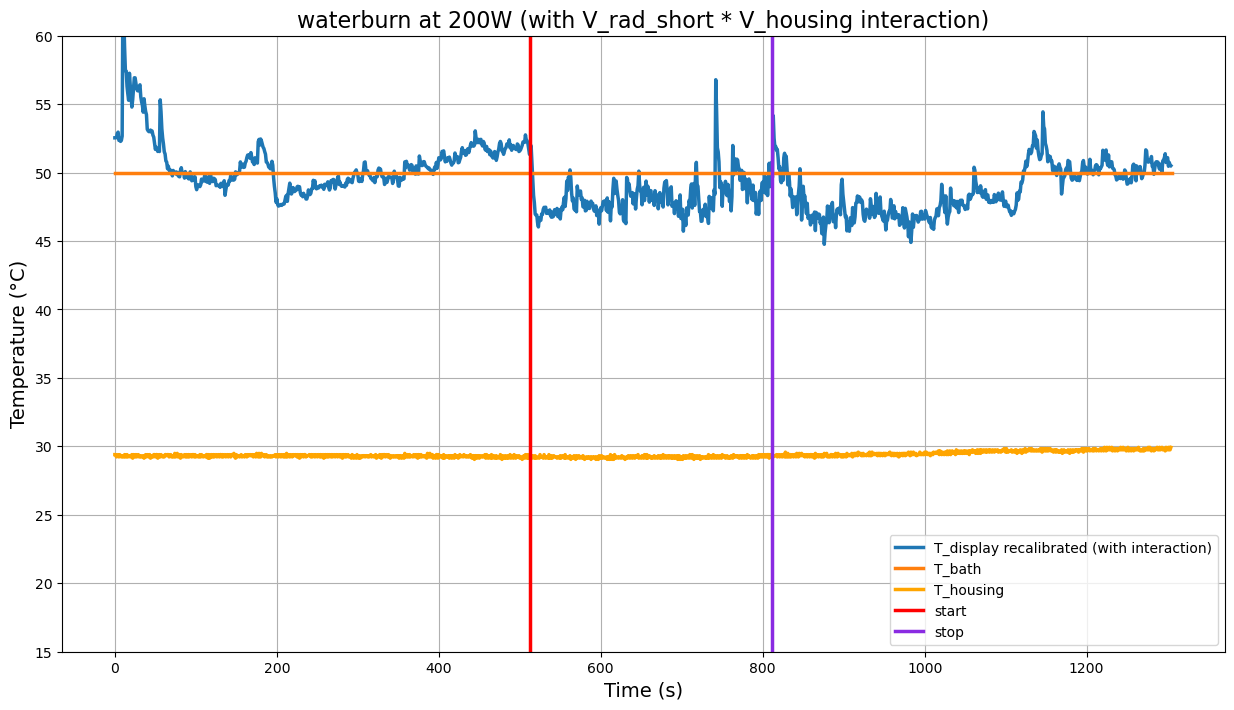

In [62]:
# Plot calibration results with V_rad_short * V_housing interaction term
for c in train:
    plt.figure(c, figsize=(15, 8))
    plt.grid()
    
    # Predict temperature using interaction model
    T_pred_interaction = model_interaction.predict(X_list[c][parameters_interaction])
    plt.plot(my_kalman_filter(T_pred_interaction), label='T_display recalibrated (with interaction)', linewidth=2.5)
    
    # Plot bath temperature
    T_bath = waterburn_today['Bath_T'].iloc[c]
    plt.plot([0, len(X_list[c])], [T_bath, T_bath], label='T_bath', linewidth=2.5)
    
    # Plot T_housing
    plt.plot(T_list[c]['T_housing'], label='T_housing', linewidth=2.5, color='orange')

    # Plot start and stop markers
    for d in idx_start_list[c]:
        plt.plot([d, d], [0, 100], label='start', linewidth=2.5, color='r')
    for e in idx_stop_list[c]:
        plt.plot([e, e], [0, 100], label='stop', linewidth=2.5, color='#8A2BE2')
    
    log_power = waterburn_today['Power'].iloc[c]
    plt.title(f'waterburn at {int(log_power)}W (with V_rad_short * V_housing interaction)', fontsize=16)
    
    plt.ylabel("Temperature (°C)", fontsize=14)
    plt.xlabel('Time (s)', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.ylim(15, 60)
    plt.show()

# Calibrate with Scaling

In [63]:
# Calibration with Z-score normalized (scaled) V values

from sklearn.preprocessing import StandardScaler

for i in [0, 1]:
    X_list[i].drop(["V_rad_short_x_V_housing", "dV_rad_tot_dt", "dV_rad_short_dt"], axis=1, inplace=True)

# Create copies of X_list for scaling
X_list_scaled = [X_list[0].copy(), X_list[1].copy()]

# Identify voltage columns to scale (exclude 'power' from scaling)
if switch == "classic":
    voltage_columns = ['V_rad', 'V_ref', 'V_spike']
elif switch == "inline":
    voltage_columns = ['V_rad_tot', 'V_rad_short', 'V_housing', 'V_spike', 'V_diode']

# Initialize scaler
scaler = StandardScaler()

# Concatenate voltage data from both datasets for fitting the scaler
voltage_data_concat = pd.concat([X_list_scaled[0][voltage_columns], X_list_scaled[1][voltage_columns]], axis=0)

# Fit the scaler on all voltage data
scaler.fit(voltage_data_concat)

# Transform each dataset separately
for i in [0, 1]:
    X_list_scaled[i][voltage_columns] = scaler.transform(X_list_scaled[i][voltage_columns])

# Concatenate scaled data for regression
X_concat_scaled = pd.concat(X_list_scaled, axis=0).reset_index(drop=True)

# Define Y as before
Y_scaled = [waterburn_today['Bath_T'].iloc[train[0]]] * len(X_list_scaled[0]) + [waterburn_today['Bath_T'].iloc[train[1]]] * len(X_list_scaled[1])

# Linear regression with scaled features
model_scaled = LinearRegression()
model_scaled.fit(X_concat_scaled, Y_scaled)

# Results of the linear regression
regression_coefficients_scaled = pd.DataFrame(model_scaled.coef_).T
regression_coefficients_scaled.columns = X_concat_scaled.columns
regression_coefficients_scaled['offset'] = model_scaled.intercept_

print("Regression coefficients with Z-score normalized V values:")
display(regression_coefficients_scaled)

# Statistical analysis with p-values
X_concat_scaled_stats = sm.add_constant(X_concat_scaled)
model_scaled_stats = sm.OLS(Y_scaled, X_concat_scaled_stats).fit()
print("\nP-values for scaled model:")
print(model_scaled_stats.pvalues)

regression_coefficients_scaled_stats = pd.DataFrame(model_scaled_stats.params).T
print("\nDetailed statistical results:")
display(regression_coefficients_scaled_stats)

# Show scaling statistics
print(f"\nScaling statistics for voltage columns:")
print(f"Feature means: {scaler.mean_}")
print(f"Feature standard deviations: {scaler.scale_}")
print(f"Voltage columns scaled: {voltage_columns}")

Regression coefficients with Z-score normalized V values:


,V_rad_tot,V_rad_short,V_housing,power,V_spike,V_diode,offset
0,-41.691568,36.293024,0.814839,-0.068055,-0.90083,1.116035,40.735254



P-values for scaled model:
const          0.000000e+00
V_rad_tot      0.000000e+00
V_rad_short    0.000000e+00
V_housing      1.005008e-22
power          0.000000e+00
V_spike        1.101051e-14
V_diode        2.322199e-03
dtype: float64

Detailed statistical results:


,const,V_rad_tot,V_rad_short,V_housing,power,V_spike,V_diode
0,40.735254,-41.691568,36.293024,0.814839,-0.068055,-0.90083,1.116035



Scaling statistics for voltage columns:
Feature means: [1866.3736476  1848.52782071  825.47140649  186.58792843  210.20264683]
Feature standard deviations: [187.17876107 242.19379319   2.84197969  41.76194365  66.23389546]
Voltage columns scaled: ['V_rad_tot', 'V_rad_short', 'V_housing', 'V_spike', 'V_diode']


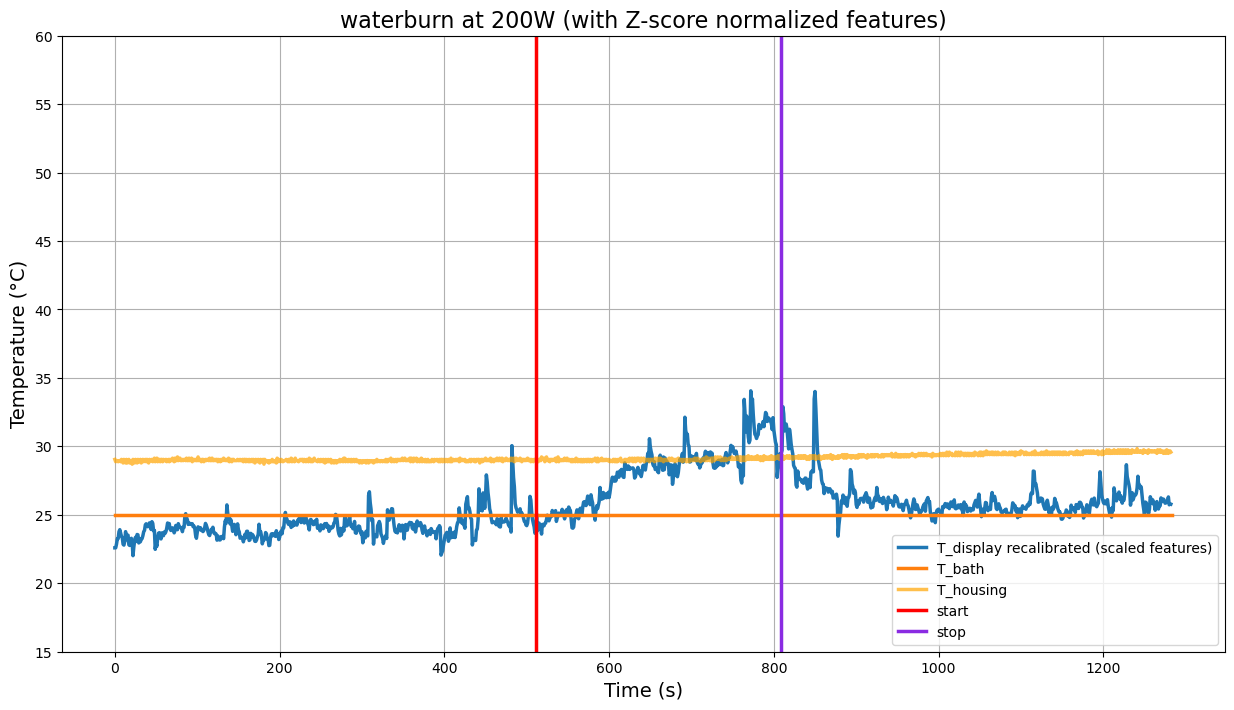

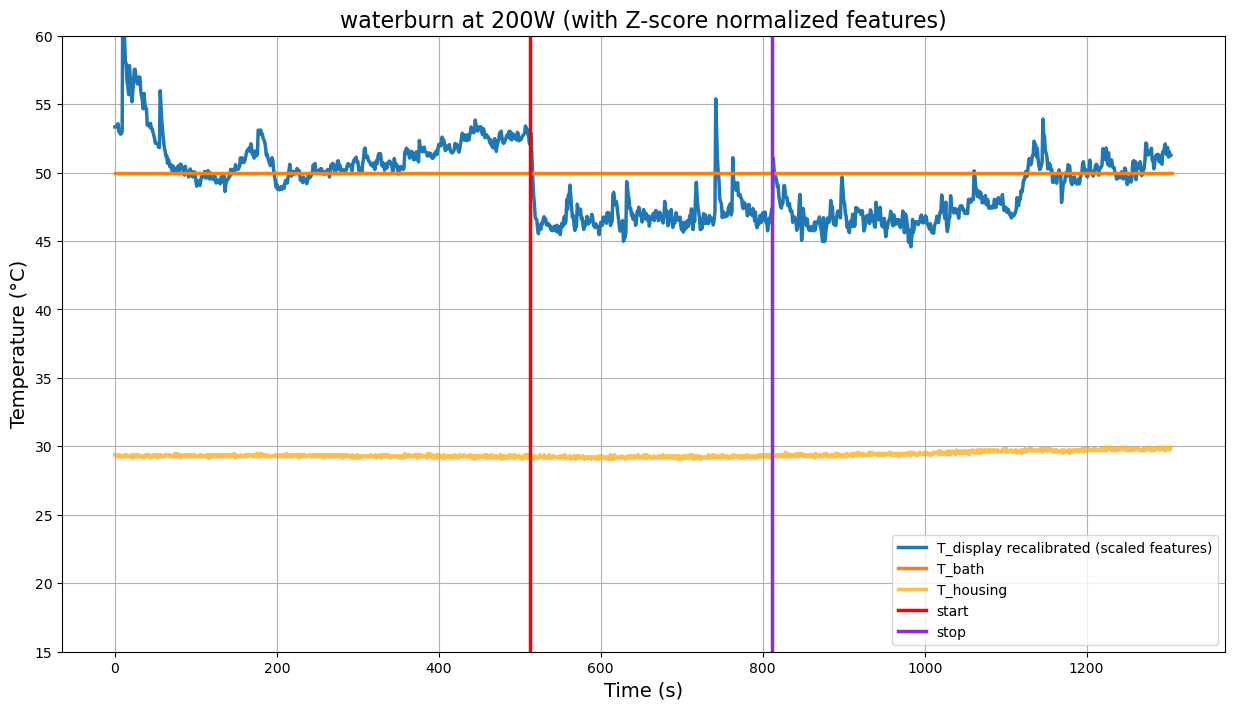

In [64]:
# Plot calibration results with Z-score normalized features
for c in train:
    plt.figure(c, figsize=(15, 8))
    plt.grid()
    
    # Predict temperature using scaled model
    T_pred_scaled = model_scaled.predict(X_list_scaled[c])
    plt.plot(my_kalman_filter(T_pred_scaled), label='T_display recalibrated (scaled features)', linewidth=2.5)
    
    # Plot bath temperature
    T_bath = waterburn_today['Bath_T'].iloc[c]
    plt.plot([0, len(X_list_scaled[c])], [T_bath, T_bath], label='T_bath', linewidth=2.5)
    
    # Plot T_housing for reference
    plt.plot(T_list[c]['T_housing'], label='T_housing', linewidth=2.5, color='orange', alpha=0.7)

    # Plot start and stop markers
    for d in idx_start_list[c]:
        plt.plot([d, d], [0, 100], label='start', linewidth=2.5, color='r')
    for e in idx_stop_list[c]:
        plt.plot([e, e], [0, 100], label='stop', linewidth=2.5, color='#8A2BE2')
    
    log_power = waterburn_today['Power'].iloc[c]
    plt.title(f'waterburn at {int(log_power)}W (with Z-score normalized features)', fontsize=16)
    
    plt.ylabel("Temperature (°C)", fontsize=14)
    plt.xlabel('Time (s)', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.ylim(15, 60)
    plt.show()

# Metrics Calculation

In [ ]:
# --- Add after X_list is created and before plotting ---

window = 10  # Number of points for smoothing

for i in [0, 1]:
    # Smooth signals (rolling mean or use my_kalman_filter)
    vtot_smooth = X_list[i]['V_rad_tot'].rolling(window, center=True, min_periods=1).mean()
    vshort_smooth = X_list[i]['V_rad_short'].rolling(window, center=True, min_periods=1).mean()
    dt = delta_time_list[i]  # time step in seconds

    # Calculate derivatives
    X_list[i]['dV_rad_tot_dt'] = np.gradient(vtot_smooth, dt)
    X_list[i]['dV_rad_short_dt'] = np.gradient(vshort_smooth, dt)

# Plot results for both logs
for i in [0, 1]:
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 1, 1)
    plt.title(f'Log {i}: V_rad_tot and its derivative')
    plt.plot(X_list[i]['V_rad_tot'], label='V_rad_tot', linewidth=2)
    plt.plot(X_list[i]['dV_rad_tot_dt'], label='dV_rad_tot/dt', linewidth=2)
    plt.legend()
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.title(f'Log {i}: V_rad_short and its derivative')
    plt.plot(X_list[i]['V_rad_short'], label='V_rad_short', linewidth=2)
    plt.plot(X_list[i]['dV_rad_short_dt'], label='dV_rad_short/dt', linewidth=2)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

In [49]:
def metrics_calculation(T_display, T_bath, idx_start_list, idx_stop_list):
    """
    Calculation of different metrics between calibrated temperature (T_display) and bath 
    temperature (T_bath)
    
    Args : 
        T_display : List containing T_display data arrays for each log. T_display must not be filtered.
        T_bath : List containing T_bath data arrays for each log.
        idx_start_list : List containing a list for each log. Each list contains the index(es) where power is launched.
        idx_stop_list : List containing a list for each log. Each list contains the index(es) where power is stopped.

    Returns : 
        min_error : Largest negative error between filtered T_display and T_bath
        max_error : Largest positive error between filtered T_display and T_bath
        std_error : Standard deviation of the error between filtered T_display and T_bath
        err_start : List containing the average error at the start of the run, for each log. Average gap over the first 30 points between
        filtered T_display and T_bath is calculated.
        err_stop : List containing the average error at the end of the run, for each log. Average gap over the last 30 points between 
        filtered T_display and T_bath is calculated
        delta_start_stop : List containing the difference between err_start and err_stop for each log.
        drift_regr_coeff : List of arrays containing the coefficients of the linear regression in the area where the power is 
        on (drift indicator), for each log. If there are several distinct power zones in one log, the regression is performed on the first zone.
    """

    # Creation of lists to store results
    err_start = []
    err_stop = []
    delta_start_stop = []
    drift_regr_coeff = []

    for i in range (len(T_display)):

        # Filter the T_display signal for each log
        T_display[i] = my_kalman_filter(T_display[i])

        # Calculation of error between T_display and T_bath for each log separaterely
        error_run = T_display[i] - T_bath[i]

        if len(error_run) > 30:
            err_start.append(np.mean(error_run[:30]))
            err_stop.append(np.mean(error_run[-30:]))
            delta_start_stop.append(err_start[i] - err_stop[i])

        if idx_stop_list[i][0] > idx_start_list[i][0] + 30:

            # Take filtered T_display where power is activated
            T_display_poweron = T_display[i][idx_start_list[i][0] + 30:idx_stop_list[i][0]]
            
            num_points = idx_stop_list[i][0] - idx_start_list[i][0] - 30
            x = np.round(np.linspace(idx_start_list[i][0] + 30, idx_stop_list[i][0], num_points))

            # Linear regression to characterize the drift when power is on
            drift_regr_coeff.append(np.polyfit(x, T_display_poweron, 1))

    # Calculation of metrics on all logs
    error = np.concatenate(T_display) - np.concatenate(T_bath)

    min_error = np.min(error)
    max_error = np.max(error)
    std_error = np.std(error)

    return min_error, max_error, std_error, err_start, err_stop, delta_start_stop, drift_regr_coeff

In [50]:
# Prediction of T_display with the model
T_display = []
for c in train :
    T_pred = model.predict(X_list[c])
    T_display.append(T_pred)    

# Definition of T_bath
T_bath = []
for c in train : 
    T_bath.append(np.array([waterburn_today['Bath_T'].iloc[c] for k in range (len(X_list[c]))])) 

In [51]:
# Calculation of metrics

min_error, max_error, std_error, err_start, err_stop, delta_start_stop, drift_regr_coeff = metrics_calculation(T_display, T_bath, [idx_start_list[i] for i in train], [idx_stop_list[i] for i in train])

In [53]:
# Tab of metrics if we have 2 logs at 25°C and 50°C

tab_metrics = pd.DataFrame({
    'min_error': [min_error],
    'max_error': [max_error],
    'std_error': [std_error],
    'err_start 25°C': [err_start[0]],
    'err_start 50°C': [err_start[1]],
    'err_stop 25°C': [err_stop[0]],
    'err_stop 50°C': [err_stop[1]],
    'delta_start_stop 25°C': [delta_start_stop[0]],
    'delta_start_stop 50°C': [delta_start_stop[1]],
    'drift_regr_coeff 25°C (ax + b)': [drift_regr_coeff[0]],
    'drift_regr_coeff 50°C (ax + b)': [drift_regr_coeff[1]]
})
tab_metrics

,min_error,max_error,std_error,err_start 25°C,err_start 50°C,err_stop 25°C,err_stop 50°C,delta_start_stop 25°C,delta_start_stop 50°C,drift_regr_coeff 25°C (ax + b),drift_regr_coeff 50°C (ax + b)
0,-5.421637,14.764931,2.486,-1.860861,6.105401,0.817576,1.268105,-2.678437,4.837296,"[0.02209689508316889, 13.53699258484627]","[0.0035444506391406564, 44.53830020725176]"
